In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf 
from tensorflow import keras
from keras import datasets, layers, models
from sklearn.model_selection import train_test_split

In [3]:
directory = "./Mask_Data/"

mask = []
label = []

for i in os.listdir(directory):
  Path = directory+"/"+i
  for j in os.listdir(Path):
    image = cv2.imread(Path+"/"+j)
    image = cv2.resize(image, (224,224), interpolation = cv2.INTER_AREA)
    b, g, r = cv2.split(image)
    image = cv2.merge([r, g, b])
    mask.append(image)
    nom = os.path.basename(Path)
    label.append(nom)

In [4]:
mask = np.array(mask)
label = np.array(label)

In [5]:
print("Pour masque:\n",mask.shape,"\n")
print("=========================================")
print("Pour label:\n",label.shape,"\n")

Pour masque:
 (1508, 224, 224, 3) 

Pour label:
 (1508,) 



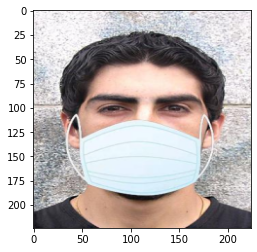

In [6]:
plt.imshow(mask[800])

In [7]:
im_mask = mask/255

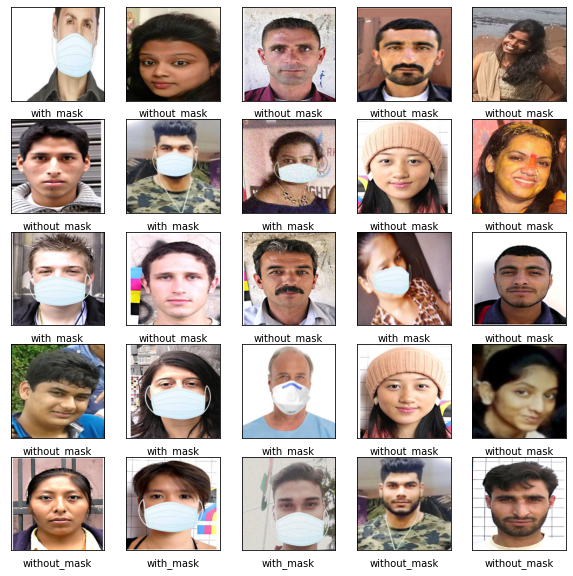

In [8]:
class_names = ['with_mask', 'without_mask']

plt.figure(figsize=(10,10))
for i in range(25):
    nbr = np.random.randint(0, 1508, [1])
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(im_mask[nbr[0]])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(label[nbr[0]])
plt.show()

In [ ]:
X_train, X_valtest, y_train, y_valtest = train_test_split(im_mask, label, test_size=0.2, random_state=1)

X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=1)


In [ ]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val, y_test.shape

((1206, 224, 224, 3),
 (151, 224, 224, 3),
 (151, 224, 224, 3),
 (1206,),
 array(['with_mask', 'with_mask', 'without_mask', 'with_mask', 'with_mask',
        'with_mask', 'with_mask', 'without_mask', 'with_mask', 'with_mask',
        'without_mask', 'with_mask', 'without_mask', 'without_mask',
        'with_mask', 'with_mask', 'without_mask', 'with_mask', 'with_mask',
        'without_mask', 'without_mask', 'without_mask', 'with_mask',
        'without_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask',
        'without_mask', 'without_mask', 'with_mask', 'with_mask',
        'with_mask', 'with_mask', 'with_mask', 'with_mask', 'without_mask',
        'without_mask', 'without_mask', 'without_mask', 'without_mask',
        'without_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask',
        'without_mask', 'without_mask', 'without_mask', 'without_mask',
        'with_mask', 'without_mask', 'without_mask', 'without_mask',
        'without_mask', 'with_mask', 'with_mask', 'wi

In [ ]:
X_train.shape

(1206, 224, 224, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_val = le.fit_transform(y_val)

In [ ]:
im_train = X_train
im_test = X_test
im_val = X_val

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator()
it = datagen.flow(im_train, y_train)

In [ ]:
from keras.applications.vgg16 import VGG16
model = VGG16(include_top=False, weights='imagenet', classes=2, input_shape=im_train[0].shape)
model.trainable = False
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
im_train.shape

(1206, 224, 224, 3)

In [ ]:
y_train.shape

(1206,)

In [ ]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(128, activation='relu')
dense_layer_2 = layers.Dense(64, activation='relu')
prediction_layer = layers.Dense(1, activation='sigmoid')


model2 = models.Sequential([
    model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
]) 

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               3211392   
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17,934,401
Trainable params: 3,219,713
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(1, activation='sigmoid')


model2 = models.Sequential([
    model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_9 (Dense)             (None, 50)                1254450   
                                                                 
 dense_10 (Dense)            (None, 20)                1020      
                                                                 
 dense_11 (Dense)            (None, 1)                 21        
                                                                 
Total params: 15,970,179
Trainable params: 1,255,491
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
np.unique(y_train)

array([0, 1], dtype=int64)

In [ ]:
model2.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

checkpoint_filepath = './tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history = model2.fit(it, batch_size=40, epochs=3, validation_data=(im_val, y_val), callbacks=model_checkpoint_callback) 

Epoch 1/3
38/38 [==============================] - 137s 4s/step - loss: 0.2381 - accuracy: 0.9038 - val_loss: 0.1462 - val_accuracy: 0.9338
Epoch 2/3
38/38 [==============================] - 151s 4s/step - loss: 0.0218 - accuracy: 0.9959 - val_loss: 0.0261 - val_accuracy: 0.9934
Epoch 3/3
38/38 [==============================] - 149s 4s/step - loss: 0.0079 - accuracy: 0.9983 - val_loss: 0.0260 - val_accuracy: 0.9868


5/5 - 17s - loss: 0.0561 - accuracy: 0.9801 - 17s/epoch - 3s/step


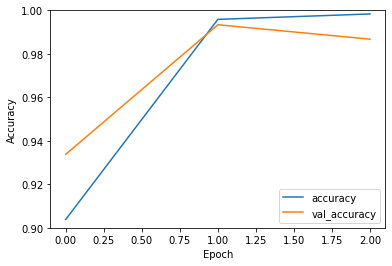

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model2.evaluate(im_test,  y_test, verbose=2)

In [ ]:
print(test_acc)

0.9801324605941772


In [ ]:
y_pred = model2.predict(im_test)
y_pred = np.array(y_pred)
#y_pred = y_pred.argmax(axis =1)
y_pred = (y_pred>0.5).astype(int)
y_pred.shape

(151, 1)

In [ ]:
y_test.shape

(151,)

In [ ]:
np.unique(y_pred)

array([0, 1])

<AxesSubplot:>

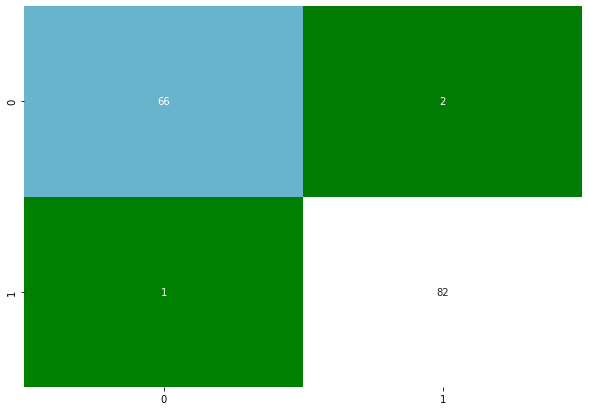

In [ ]:
matrix= tf.math.confusion_matrix(
    y_test,
    y_pred,
    num_classes=2,
    weights=None,
    dtype=tf.dtypes.int32,
    name = None
)
import seaborn as sns

plt.figure(figsize = (10,7))
sns.heatmap(matrix, annot=True, cbar=False, fmt="d", cmap="ocean")

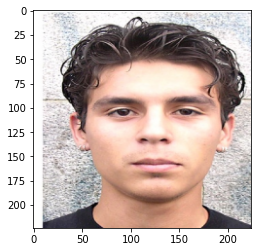

In [ ]:
plt.imshow(im_test[0])

In [ ]:
y_pred[0]

array([1])

In [ ]:
model2.save("modelmask")

INFO:tensorflow:Assets written to: modelmask\assets


Pour l'image suivante :


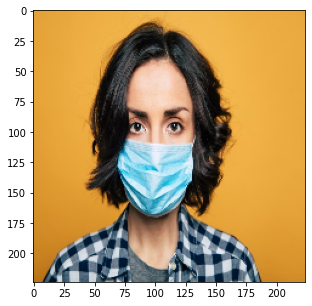

La prediction est: 
Avec masque


In [ ]:
from tensorflow.keras.models import load_model
img = cv2.imread("001.jpg")
b, g, r = cv2.split(img)
img = cv2.merge([r, g, b])
img = cv2.resize(img,(224,224))     # resize image to match model's expected sizing
img = img.reshape(1,224,224,3)
img = np.array(img)

m_m = tf.keras.models.load_model('modelmask') 
prediction = m_m.predict(img)

print("Pour l'image suivante :")
plt.figure(figsize=(5,5))
plt.imshow(img[0])
plt.show()

print("La prediction est: ") 
if prediction[0] < 0.5 : 
  print("Avec masque")
if prediction[0] > 0.5 :
  print("Sans masque")